In [1]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
import seaborn as sns


# USE FILTER BELOW

In [83]:
df = pd.read_csv(r'C:\Users\Feele\Documents\Data\Sunderland\heatfilter.csv')

In [84]:
df.head()

,Unnamed: 0,id,minute,second,teamId,x,y,endX,endY,period/value,...,qualifiers/3/type/displayName,qualifiers/4/type/displayName,qualifiers/5/type/displayName,qualifiers/6/type/displayName,qualifiers/7/type/displayName,qualifiers/8/type/displayName,qualifiers/9/type/displayName,qualifiers/10/type/displayName,qualifiers/11/type/displayName,qualifiers/12/type/displayName
0,12,2321270813,0,52.0,16,28.3,32.9,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,2321270881,0,52.0,16,26.0,27.6,37.5,53.0,1,...,HeadPass,Angle,Zone,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52,2321275277,3,12.0,16,34.7,17.4,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53,2321275371,3,13.0,16,34.7,17.4,39.1,32.7,1,...,PassEndY,Zone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,63,2321276843,3,55.0,16,28.4,30.1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df['name'].value_counts(dropna = False)

Winchester    73
Name: name, dtype: int64

In [86]:
# Inflating X and Y to pitchsize

df['x'] = df['x']*1.2
df['endX'] = df['endX']*1.2
df['y'] = df['y']*.8
df['endY'] = df['endY']*.8

In [88]:
df1 = df[df['minute']<=15] 
df2 = df[(df['minute'] >=16 ) & (df['minute'] <31)] 
df3 = df[(df['minute'] >=31 ) & (df['minute'] <46)] 
df4 = df[(df['minute'] >=46 ) & (df['minute'] <61)] 
df5 = df[(df['minute'] >=61 ) & (df['minute'] <76)] 
df6 = df[df['minute']>=76]
df7 = df[df['period/value']==1] 
df8 = df[df['period/value']==2]


### Colour chat for heat map 

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

C:\Users\Feele\Documents\Analytics\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


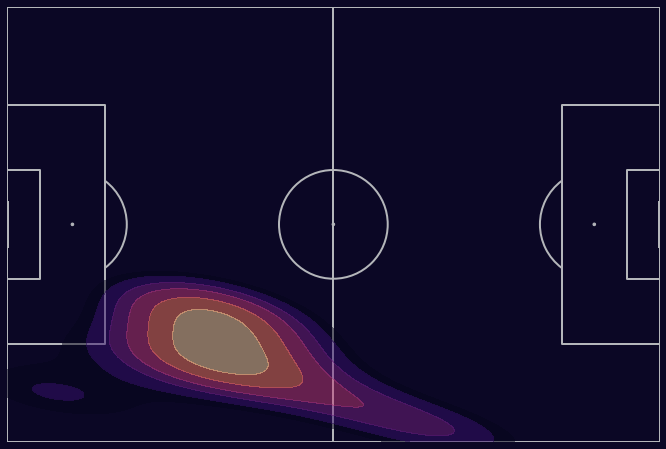

In [91]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#0B0725')
ax.patch.set_facecolor('#0B0725')

#pitch
pitch = Pitch(pitch_type='statsbomb',
              orientation='horizontal',
              pitch_color='#0B0725', 
              line_color='#B4B6BA', 
              figsize=(13, 8),
              constrained_layout=False, 
              tight_layout=True)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

##### HEAT MAP ADDITION ####

kde = sns.kdeplot(
        df1['x'],
        df1['y'],
        shade =True,
        thresh=.3,
        alpha=.5,
        n_levels=7,
        cmap = 'magma',
        #cbar = 'True'
)

#Limited Heat Map to edges
plt.xlim(0,120)
plt.ylim(0,80) 

plt.savefig('heat.png',dpi=500,bbox_inches = 'tight') 

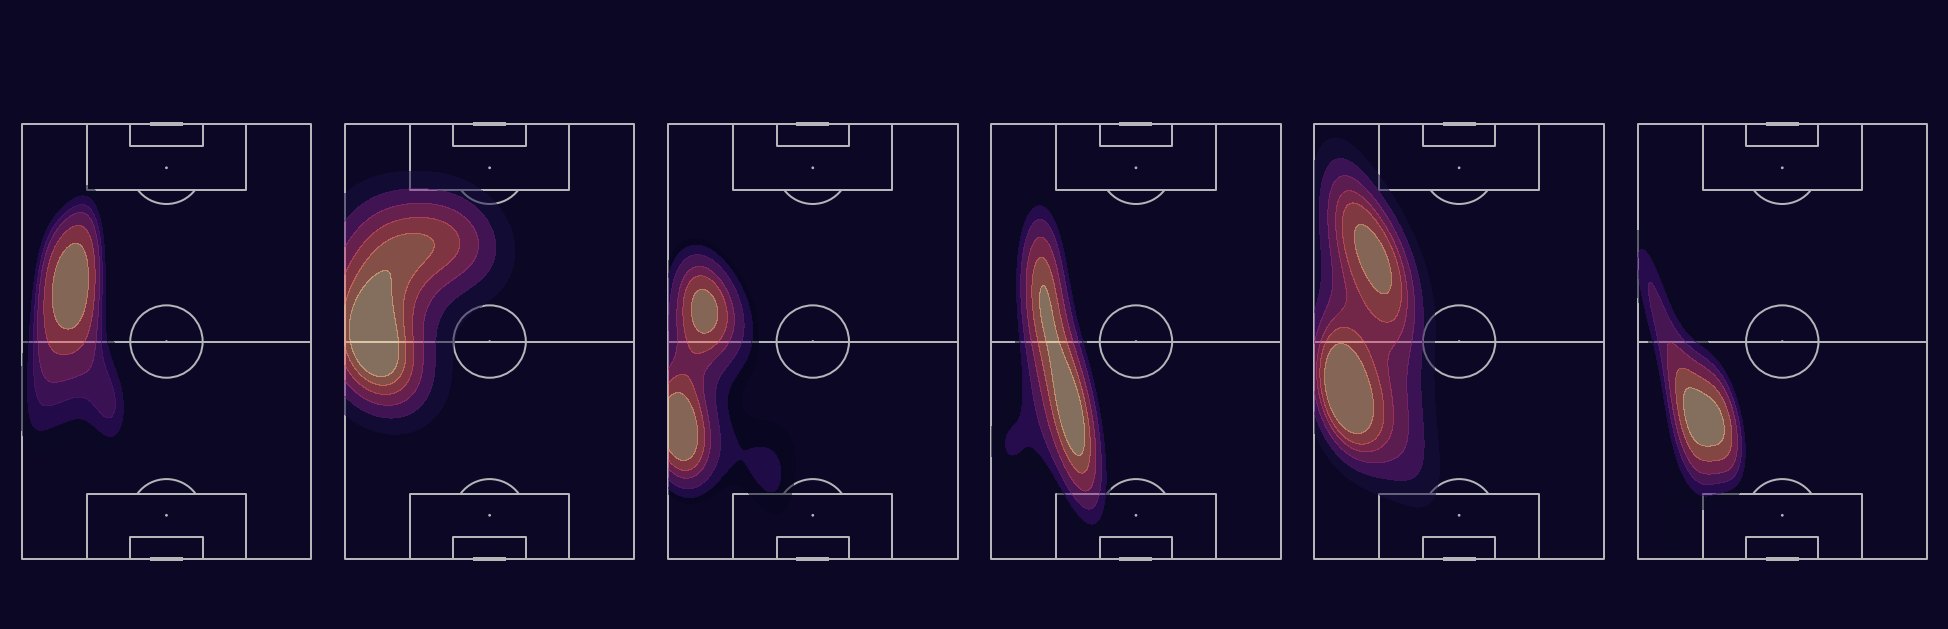

In [90]:
pitch = VerticalPitch(pitch_type='statsbomb',
              line_color='#B4B6BA',
              pitch_color='#0B0725')


fig,axs = pitch.grid(ncols=6, axis=False)
fig.set_facecolor('#0B0725')


kde1 = pitch.kdeplot(df6.x, df6.y, ax=axs['pitch'][0],
                           levels=7,
                           shade =True,
                           thresh=.3,
                           alpha=.5,
                           cmap='magma')

kde2 = pitch.kdeplot(df5.x, df5.y, ax=axs['pitch'][1],
                           levels=7,
                           shade =True,
                           thresh=.3,
                           alpha=.5,
                           cmap='magma')

kde3 = pitch.kdeplot(df4.x, df4.y, ax=axs['pitch'][2],
                           levels=7,
                           shade =True,
                           thresh=.3,
                           alpha=.5,
                           cmap='magma')

kde4 = pitch.kdeplot(df3.x, df3.y, ax=axs['pitch'][3],
                           levels=7,
                           shade =True,
                           thresh=.3,
                           alpha=.5,
                           cmap='magma')

kde5 = pitch.kdeplot(df2.x, df2.y, ax=axs['pitch'][4],
                           levels=7,
                           shade =True,
                           thresh=.3,
                           alpha=.5,
                           cmap='magma')

kde6 = pitch.kdeplot(df1.x, df1.y, ax=axs['pitch'][5],
                           levels=7,
                           shade =True,
                           thresh=.3,
                           alpha=.5,
                           cmap='magma')



#Limited Heat Map to edges
plt.xlim(0,120)
plt.ylim(0,80) 

plt.savefig('heat.png',dpi=500,bbox_inches = 'tight') 

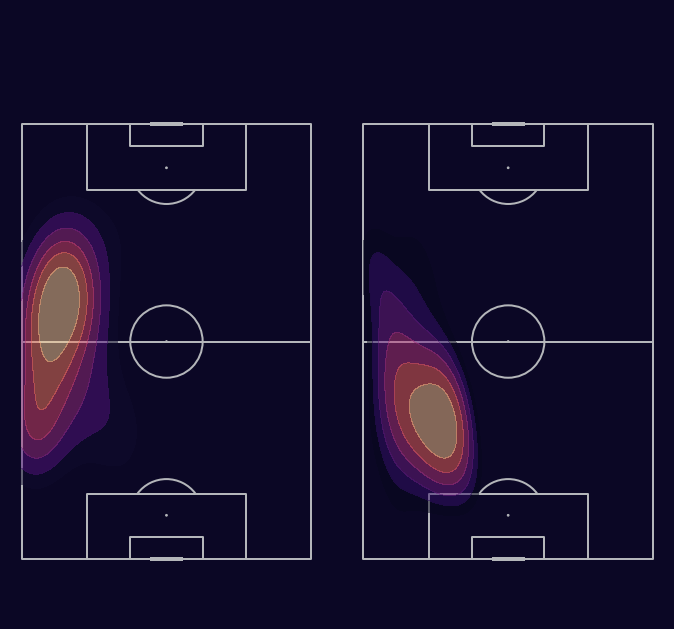

In [89]:
pitch = VerticalPitch(pitch_type='statsbomb',
              line_color='#B4B6BA',
              pitch_color='#0B0725')


fig,axs = pitch.grid(ncols=2, axis=False)
fig.set_facecolor('#0B0725')


kde1 = pitch.kdeplot(df8.x, df8.y, ax=axs['pitch'][0],
                           levels=7,
                           shade =True,
                           thresh=.3,
                           alpha=.5,
                           cmap='magma')

kde2 = pitch.kdeplot(df7.x, df7.y, ax=axs['pitch'][1],
                           levels=7,
                           shade =True,
                           thresh=.3,
                           alpha=.5,
                           cmap='magma')

plt.savefig('heat.png',dpi=500,bbox_inches = 'tight') 